In [1]:
from LaviRot import *
import numpy as np
%matplotlib inline

In [2]:
E = 211e9
Gs = 81.2e9
rho = 7810

In [3]:
si_d = 0
so_d = 0.127

In [4]:
L = [0.07, # thrust collar
    0.058,
    0.058, # 0 probe
    0.052, # 0 bearing
    0.092,
    0.092,
    0.092,
    0.092, # 0 impeller
    0.082, # 1 impeller
    0.082, # 2 impeller
    0.082, # 3 impeller
    0.082, # 4 impeller
    0.082, # 5 impeller
    0.068, # honeycomb # change diameter
    0.086,
    0.086,
    0.086,
    0.086, # 1 bearing
    0.086,
    0.086]

In [5]:
nelem = [x for x in range(len(L))]

In [6]:
shaft_elem = [ShaftElement(n, l, si_d, so_d, E, Gs, rho,
                           shear_effects=True,
                           rotary_inertia=True,
                           gyroscopic=True) for n, l in zip(nelem, L)]

In [7]:
colar = DiskElement(1, rho, 0.035, so_d, 0.245)
disk0 = DiskElement(8, rho, 0.02, so_d, 0.318)
disk1 = DiskElement(9, rho, 0.02, so_d, 0.318)
disk2 = DiskElement(10, rho, 0.02, so_d, 0.318)
disk3 = DiskElement(11, rho, 0.02, so_d, 0.318)
disk4 = DiskElement(12, rho, 0.02, so_d, 0.318)
disk5 = DiskElement(13, rho, 0.02, so_d, 0.318)

In [8]:
stfx = 1e8
stfy = 1e8
bearing0 = BearingElement(4, kxx=stfx, kyy=stfy, cxx=0, cyy=0)
bearing1 = BearingElement(-3, kxx=stfx, kyy=stfy, cxx=0, cyy=0)

In [9]:
compressor = Rotor(shaft_elem,
                   [colar, disk0, disk1, disk2, disk3, disk4, disk5],
                   [bearing0, bearing1])

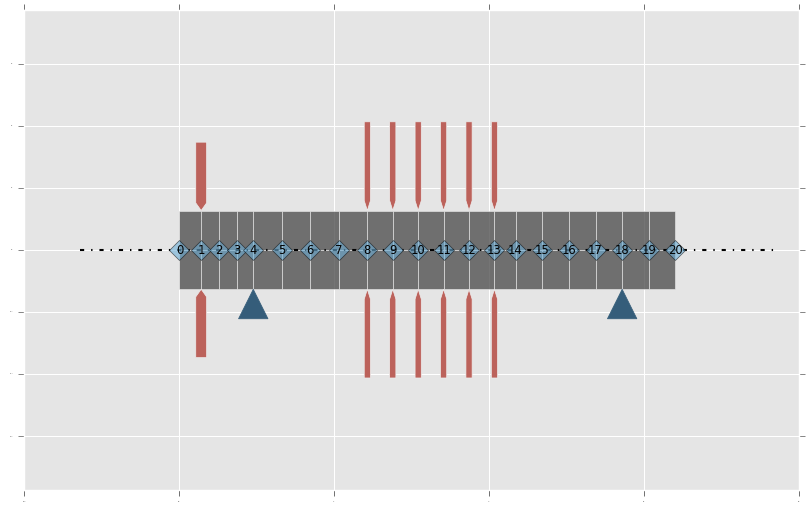

In [10]:
plot_rotor(compressor)

In [11]:
speed = np.linspace(0, 1500, 10)

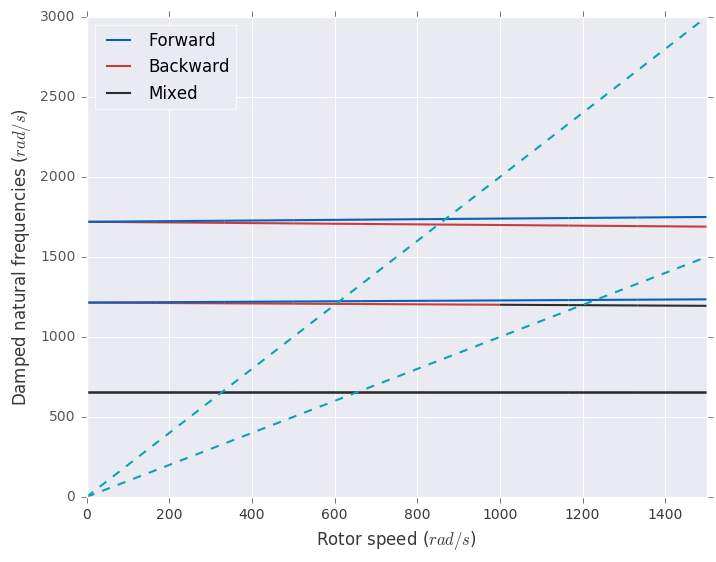

In [12]:
campbell(compressor, speed, mult=[1, 2])